/Users/adelmuursepp/opt/anaconda3/envs/citadel-datathon24/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/adelmuursepp/opt/anaconda3/envs/citadel-datathon24/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/var/folders/cv/0rgfl8cs40g0lnwkzp8sskhh0000gn/T/ipykernel_59619/314266829.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="VIF", y="feature", data=vif_data, palette="viridis")


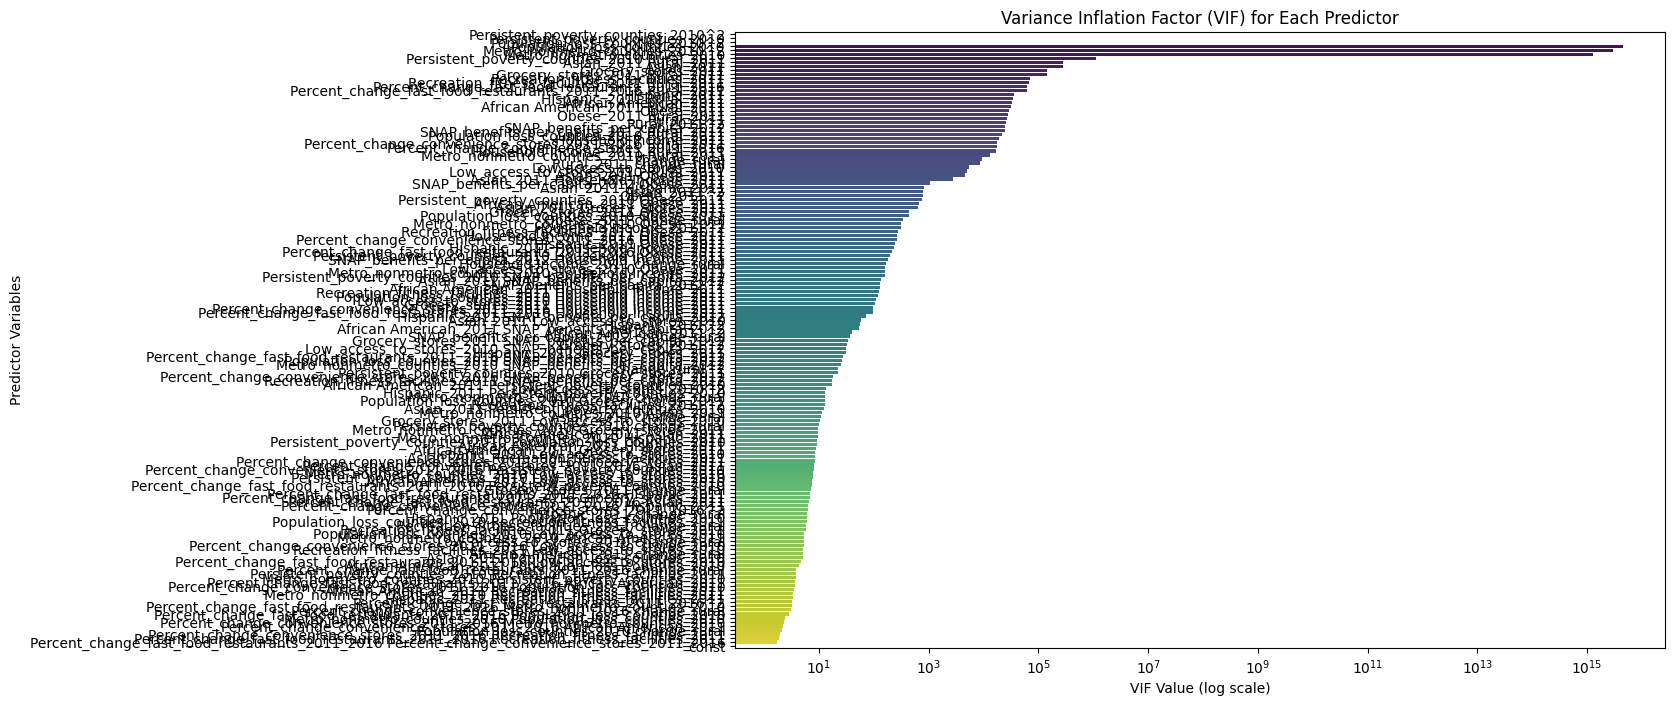

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Assuming 'cleaned_data' is your DataFrame with predictor variables and no missing data

# Add polynomial features (degree 2) to the predictor variables
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(cleaned_data[predictor_columns])

# Create a DataFrame with the polynomial feature names
poly_feature_names = poly.get_feature_names_out(predictor_columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Add a constant term for the intercept in the regression
X_poly_df = sm.add_constant(X_poly_df)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_poly_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_poly_df.values, i) for i in range(X_poly_df.shape[1])]

# Sort the VIF data for better visualization
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# Visualize VIF values using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x="VIF", y="feature", data=vif_data, palette="viridis")
plt.title("Variance Inflation Factor (VIF) for Each Predictor")
plt.xlabel("VIF Value (log scale)")
plt.xscale("log")
plt.ylabel("Predictor Variables")
plt.show()


In [4]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Assuming 'cleaned_data' is your DataFrame with predictor variables and no missing data

# Add polynomial features (degree 2) to the predictor variables
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(cleaned_data[predictor_columns])

# Create a DataFrame with the polynomial feature names
poly_feature_names = poly.get_feature_names_out(predictor_columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Add a constant term for the intercept
X_poly_df = sm.add_constant(X_poly_df)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_poly_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_poly_df.values, i) for i in range(X_poly_df.shape[1])]

# Filter out features with VIF greater than 10 (commonly considered as high)
high_vif = vif_data[vif_data["VIF"] > 1]

# Print the high VIF values
print("Features with High VIF values (VIF > 10):")
print(high_vif)


/Users/adelmuursepp/opt/anaconda3/envs/citadel-datathon24/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/adelmuursepp/opt/anaconda3/envs/citadel-datathon24/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Features with High VIF values (VIF > 10):
                                            feature           VIF
1    Percent_change_fast_food_restaurants_2011_2016  6.196855e+04
2       Percent_change_convenience_stores_2011_2016  1.751196e+04
3                      Metro_nonmetro_counties_2010  1.286743e+15
4                             African American_2011  3.300959e+04
5                                        Asian_2011  2.775339e+05
..                                              ...           ...
148                           Obese_2011 Rural_2011  2.814294e+04
149                         Obese_2011 change_rural  3.400688e+02
150                                    Rural_2011^2  2.573054e+04
151                         Rural_2011 change_rural  8.707231e+03
152                                  change_rural^2  2.251875e+01

[152 rows x 2 columns]


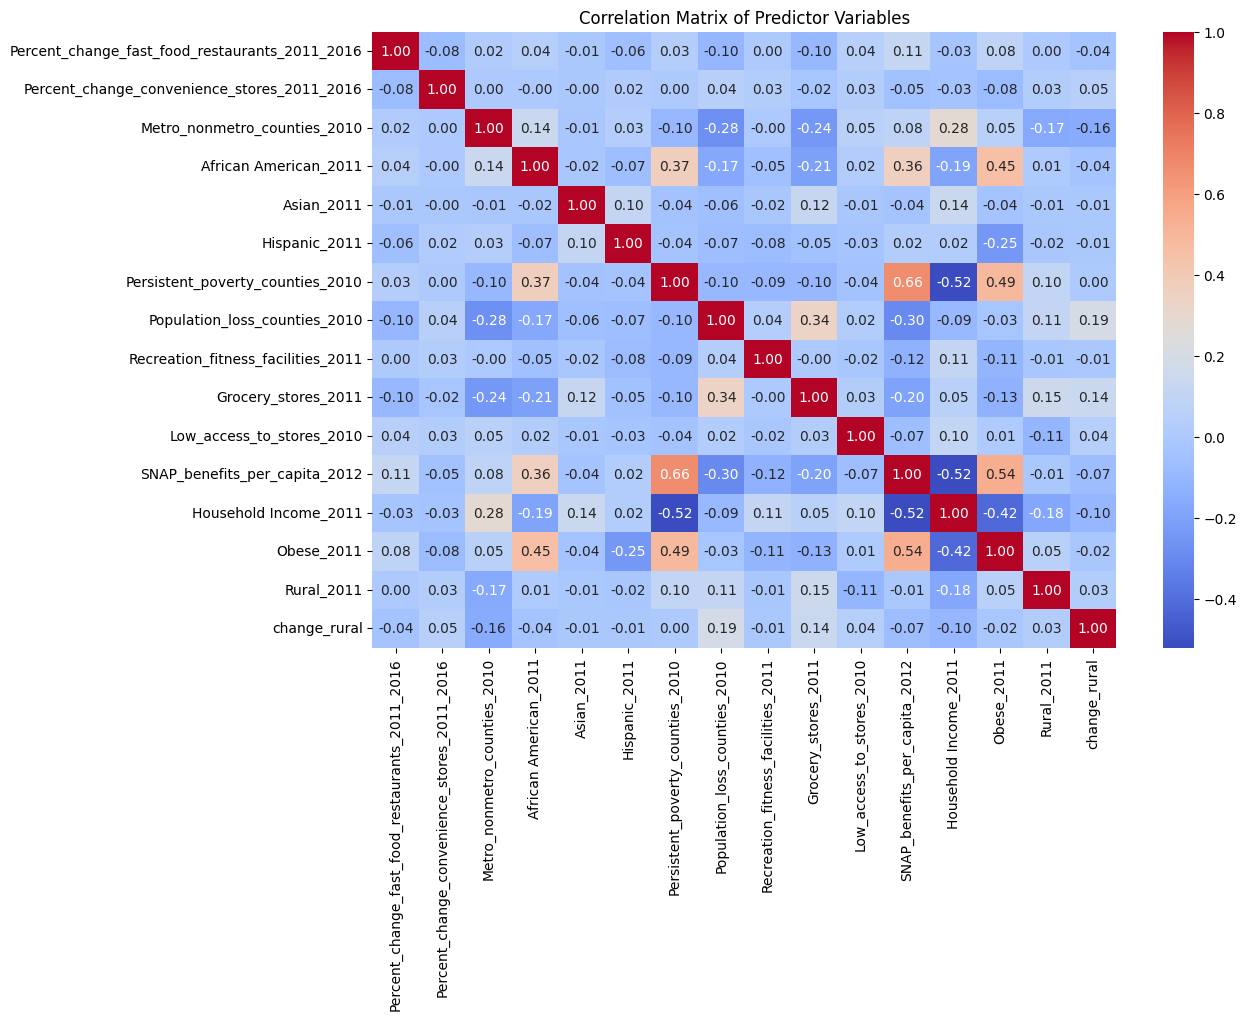

Highly correlated pairs (correlation > 0.9):
Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = cleaned_data[predictor_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Predictor Variables")
plt.show()

# Optionally, print the most highly correlated pairs
high_corr_pairs = corr_matrix.abs().stack().reset_index().sort_values(0, ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs['level_0'] != high_corr_pairs['level_1']]
high_corr_pairs = high_corr_pairs[high_corr_pairs[0] > 0.9]  # Pairs with correlation greater than 0.9
print("Highly correlated pairs (correlation > 0.9):")
print(high_corr_pairs)


In [7]:
cleaned_data = merged_data

In [9]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 38 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FIPS                                                  3137 non-null   int64  
 1   State_2011                                            3137 non-null   object 
 2   County_2011                                           3137 non-null   object 
 3   Rural_2011                                            3136 non-null   float64
 4   Household Income_2011                                 3136 non-null   float64
 5   African American_2011                                 3137 non-null   float64
 6   Asian_2011                                            3137 non-null   float64
 7   Hispanic_2011                                         3137 non-null   float64
 8   Obese_2011                                            3137

In [13]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Assuming predictor_columns and response_columns are already defined

# Create interaction terms manually or use PolynomialFeatures
interaction_columns = [
    'Rural_2011', 'Household Income_2011', 'Obese_2011', 
    'African American_2011', 'Asian_2011', 'Hispanic_2011'
]

# Generate interaction terms
interaction_terms = [
    'Rural_2011_fast_food_interaction',
    'Household Income_2011_fast_food_interaction',
    'Obese_2011_fast_food_interaction',
    'African American_2011_fast_food_interaction',
    'Asian_2011_fast_food_interaction',
    'Hispanic_2011_fast_food_interaction',
    'Rural_2011_convenience_stores_interaction',
    'Household Income_2011_convenience_stores_interaction',
    'Obese_2011_convenience_stores_interaction',
    'African American_2011_convenience_stores_interaction',
    'Asian_2011_convenience_stores_interaction',
    'Hispanic_2011_convenience_stores_interaction'
]

# Include the original predictors and the interaction terms
predictors_with_interactions = predictor_columns + interaction_terms

# Add a constant term
X_interaction = sm.add_constant(cleaned_data[predictors_with_interactions])

# Check for NaN or Inf values in the predictors
X_interaction = X_interaction.replace([np.inf, -np.inf], np.nan).dropna()

# Loop over each response variable and run the regression
for response in response_columns:
    # Align the indices of Y with X_interaction
    Y = cleaned_data.loc[X_interaction.index, response]
    
    # Fit the model
    model = sm.OLS(Y, X_interaction).fit()
    
    print(f'Results for {response}:')
    print(model.summary())
    print('\n\n')


Results for change_obese:
                            OLS Regression Results                            
Dep. Variable:           change_obese   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     12.68
Date:                Sat, 03 Aug 2024   Prob (F-statistic):           1.04e-54
Time:                        23:50:13   Log-Likelihood:                -6849.9
No. Observations:                3008   AIC:                         1.376e+04
Df Residuals:                    2979   BIC:                         1.393e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [14]:
import statsmodels.api as sm
import pandas as pd

# Initialize a dictionary to store the results for each state
statewise_results = {}

# Get the list of unique states
states = cleaned_data['State_2011'].unique()

# Loop over each state
for state in states:
    # Filter the data for the current state
    state_data = cleaned_data[cleaned_data['State_2011'] == state]
    
    # Drop rows with NaNs or Infs
    X_state = sm.add_constant(state_data[predictors_with_interactions].replace([np.inf, -np.inf], np.nan).dropna())
    Y_state = state_data.loc[X_state.index, 'change_obese']  # Align Y with X
    
    # Ensure there are enough data points to run the model
    if len(Y_state) < 2:
        print(f"Not enough data points for {state}. Skipping this state.")
        continue
    
    # Fit the model
    model_state = sm.OLS(Y_state, X_state).fit()
    
    # Store the summary in the dictionary
    statewise_results[state] = model_state.summary()

# Print results for each state
for state, summary in statewise_results.items():
    print(f"Results for {state}:")
    print(summary)
    print('\n\n')


/Users/adelmuursepp/opt/anaconda3/envs/citadel-datathon24/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)
/Users/adelmuursepp/opt/anaconda3/envs/citadel-datathon24/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/adelmuursepp/opt/anaconda3/envs/citadel-datathon24/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/adelmuursepp/opt/anaconda3/envs/citadel-datathon24/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return

Results for Wisconsin:
                            OLS Regression Results                            
Dep. Variable:           change_obese   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.133
Date:                Sat, 03 Aug 2024   Prob (F-statistic):              0.349
Time:                        23:56:08   Log-Likelihood:                -142.23
No. Observations:                  71   AIC:                             338.5
Df Residuals:                      44   BIC:                             399.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [16]:
import statsmodels.api as sm
import pandas as pd

# Initialize a dictionary to store the coefficients for each state
statewise_coefficients = {}

# Get the list of unique states
states = cleaned_data['State_2011'].unique()

# Loop over each state
for state in states:
    # Filter the data for the current state
    state_data = cleaned_data[cleaned_data['State_2011'] == state]
    
    # Drop rows with NaNs or Infs
    X_state = sm.add_constant(state_data[predictors_with_interactions].replace([np.inf, -np.inf], np.nan).dropna())
    Y_state = state_data.loc[X_state.index, 'change_obese']  # Align Y with X
    
    # Ensure there are enough data points to run the model
    if len(Y_state) < 2:
        print(f"Not enough data points for {state}. Skipping this state.")
        continue
    
    # Fit the model
    model_state = sm.OLS(Y_state, X_state).fit()
    
    # Extract the coefficients for the variables of interest
    coeffs = model_state.params[['Percent_change_fast_food_restaurants_2011_2016', 
                                 'Percent_change_convenience_stores_2011_2016']]
    pvals = model_state.pvalues[['Percent_change_fast_food_restaurants_2011_2016', 
                                 'Percent_change_convenience_stores_2011_2016']]
    
    # Store the coefficients and p-values in the dictionary
    statewise_coefficients[state] = {'coefficients': coeffs, 'p-values': pvals}

# Print the results for each state
print("Statewise Coefficients and P-values:")
for state, results in statewise_coefficients.items():
    print(f"\nResults for {state}:")
    print(f"Percent_change_fast_food_restaurants_2011_2016: Coefficient = {results['coefficients']['Percent_change_fast_food_restaurants_2011_2016']}, P-value = {results['p-values']['Percent_change_fast_food_restaurants_2011_2016']}")
    print(f"Percent_change_convenience_stores_2011_2016: Coefficient = {results['coefficients']['Percent_change_convenience_stores_2011_2016']}, P-value = {results['p-values']['Percent_change_convenience_stores_2011_2016']}")


Statewise Coefficients and P-values:

Results for Wisconsin:
Percent_change_fast_food_restaurants_2011_2016: Coefficient = -0.14602894241094316, P-value = 0.6978993224715544
Percent_change_convenience_stores_2011_2016: Coefficient = -0.018146717908706866, P-value = 0.9765933643605793

Results for Washington:
Percent_change_fast_food_restaurants_2011_2016: Coefficient = 0.596413676228267, P-value = 0.5065615197056073
Percent_change_convenience_stores_2011_2016: Coefficient = -1.0928997963493234, P-value = 0.11832251310533183

Results for New Hampshire:
Percent_change_fast_food_restaurants_2011_2016: Coefficient = 0.02809524613850493, P-value = nan
Percent_change_convenience_stores_2011_2016: Coefficient = -0.025993239659559523, P-value = nan

Results for Alaska:
Percent_change_fast_food_restaurants_2011_2016: Coefficient = 0.8604399847527264, P-value = nan
Percent_change_convenience_stores_2011_2016: Coefficient = 0.5635977349682794, P-value = nan

Results for Hawaii:
Percent_change_fas

In [17]:
import pandas as pd

# Initialize a dictionary to store the correlations for each state
statewise_correlations = {}

# Get the list of unique states
states = cleaned_data['State_2011'].unique()

# Loop over each state
for state in states:
    # Filter the data for the current state
    state_data = cleaned_data[cleaned_data['State_2011'] == state]
    
    # Drop rows with NaNs in relevant columns
    relevant_columns = ['change_obese', 
                        'Percent_change_fast_food_restaurants_2011_2016', 
                        'Percent_change_convenience_stores_2011_2016']
    state_data = state_data.dropna(subset=relevant_columns)
    
    # Ensure there are enough data points to calculate correlation
    if len(state_data) < 2:
        print(f"Not enough data points for {state}. Skipping this state.")
        continue
    
    # Calculate correlations
    corr_fast_food = state_data['change_obese'].corr(state_data['Percent_change_fast_food_restaurants_2011_2016'])
    corr_convenience_stores = state_data['change_obese'].corr(state_data['Percent_change_convenience_stores_2011_2016'])
    
    # Store the correlations in the dictionary
    statewise_correlations[state] = {'fast_food_correlation': corr_fast_food, 
                                     'convenience_stores_correlation': corr_convenience_stores}

# Print the results for each state
print("Statewise Correlations:")
for state, correlations in statewise_correlations.items():
    print(f"\nResults for {state}:")
    print(f"Correlation between change_obese and Percent_change_fast_food_restaurants_2011_2016: {correlations['fast_food_correlation']}")
    print(f"Correlation between change_obese and Percent_change_convenience_stores_2011_2016: {correlations['convenience_stores_correlation']}")


Statewise Correlations:

Results for Wisconsin:
Correlation between change_obese and Percent_change_fast_food_restaurants_2011_2016: 0.15206950204965003
Correlation between change_obese and Percent_change_convenience_stores_2011_2016: 0.06059281940422395

Results for Washington:
Correlation between change_obese and Percent_change_fast_food_restaurants_2011_2016: 0.16662976271498886
Correlation between change_obese and Percent_change_convenience_stores_2011_2016: -0.3713534343517192

Results for New Hampshire:
Correlation between change_obese and Percent_change_fast_food_restaurants_2011_2016: -0.13757063394190752
Correlation between change_obese and Percent_change_convenience_stores_2011_2016: 0.5132927807855462

Results for Alaska:
Correlation between change_obese and Percent_change_fast_food_restaurants_2011_2016: -0.37521445811936366
Correlation between change_obese and Percent_change_convenience_stores_2011_2016: 0.025999025979616786

Results for Hawaii:
Correlation between change_

In [18]:
import statsmodels.api as sm
import pandas as pd

# Initialize a list to store the prediction results
prediction_results = []

# Get the list of unique states
states = cleaned_data['State_2011'].unique()

# Define the increase in fast food restaurants
increase_in_fast_food = 10

# Loop over each state
for state in states:
    # Filter the data for the current state
    state_data = cleaned_data[cleaned_data['State_2011'] == state]
    
    # Drop rows with NaNs or Infs
    X_state = sm.add_constant(state_data[predictor_columns].replace([np.inf, -np.inf], np.nan).dropna())
    Y_state = state_data.loc[X_state.index, 'change_obese']  # Align Y with X
    
    # Ensure there are enough data points to run the model
    if len(Y_state) < 2:
        print(f"Not enough data points for {state}. Skipping this state.")
        continue
    
    # Fit the model
    model_state = sm.OLS(Y_state, X_state).fit()
    
    # Create a copy of X_state to modify for the prediction
    X_state_modified = X_state.copy()
    
    # Increase the Percent_change_fast_food_restaurants_2011_2016 by 10
    X_state_modified['Percent_change_fast_food_restaurants_2011_2016'] += increase_in_fast_food
    
    # Predict the change in obesity
    predicted_change = model_state.predict(X_state_modified)
    
    # Store the results
    state_results = pd.DataFrame({
        'FIPS': state_data.loc[X_state.index, 'FIPS'],
        'State': state,
        'County': state_data.loc[X_state.index, 'County_2011'],
        'Predicted_change_obese': predicted_change
    })
    
    prediction_results.append(state_results)

# Combine all the results into a single DataFrame
final_results = pd.concat(prediction_results, ignore_index=True)

# Save the results to a CSV file
final_results.to_csv('predicted_obesity_changes.csv', index=False)

print("Predicted obesity changes have been saved to 'predicted_obesity_changes.csv'.")


Predicted obesity changes have been saved to 'predicted_obesity_changes.csv'.


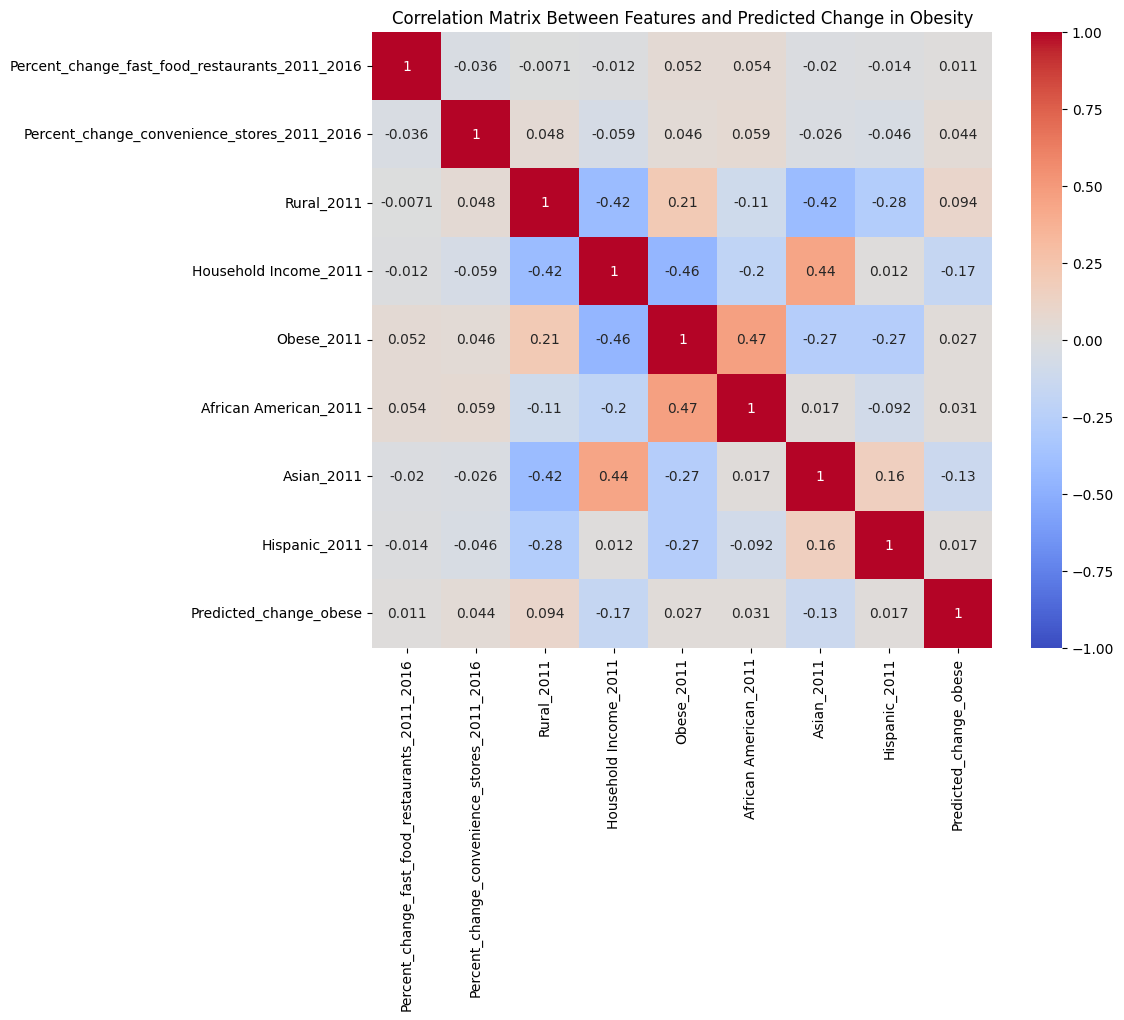

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the predicted values from the CSV file (assuming it's named 'predicted_obesity_changes.csv')
predicted_data = pd.read_csv('predicted_obesity_changes.csv')

# Merge the predicted data with the original cleaned data to get the features
merged_data_with_predictions = pd.merge(cleaned_data, predicted_data, on=['FIPS'])

# Select the relevant features and the predicted change in obesity
features_to_explore = [
    'Percent_change_fast_food_restaurants_2011_2016',
    'Percent_change_convenience_stores_2011_2016',
    'Rural_2011', 
    'Household Income_2011', 
    'Obese_2011', 
    'African American_2011', 
    'Asian_2011', 
    'Hispanic_2011'
]

# Create a DataFrame with the features and the predicted change in obesity
# analysis_data = merged_data_with_predictions[features_to_explore + ['Predicted_change_obese']]

# # Pairplot to visualize relationships between features and predicted change in obesity
# sns.pairplot(analysis_data, y_vars=['Predicted_change_obese'], x_vars=features_to_explore, kind='reg')
# plt.suptitle("Relationships Between Features and Predicted Change in Obesity", y=1.02)
# plt.show()

# Heatmap to visualize correlations between features and predicted change in obesity
correlation_matrix = analysis_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Between Features and Predicted Change in Obesity")
plt.show()

# # Scatter plot to visualize predicted change in obesity against key features
# for feature in features_to_explore:
#     plt.figure(figsize=(8, 6))
#     sns.scatterplot(x=analysis_data[feature], y=analysis_data['Predicted_change_obese'])
#     plt.title(f"Predicted Change in Obesity vs {feature}")
#     plt.xlabel(feature)
#     plt.ylabel('Predicted Change in Obesity')
#     plt.show()


In [22]:
import pandas as pd
import statsmodels.api as sm

# Load the cleaned data
# Assume `cleaned_data` is already available from the previous steps

# Initialize a list to store the prediction results
prediction_results = []

# Get the list of unique states
states = cleaned_data['State_2011'].unique()

# Loop over each state
for state in states:
    # Filter the data for the current state
    state_data = cleaned_data[cleaned_data['State_2011'] == state]
    
    # Drop rows with NaNs in predictor or response columns
    state_data = state_data.dropna(subset=[
        'change_obese', 
        'change_binge_drinking', 
        'change_physical_inactivity', 
        'change_mentally_unhealthy_days',
        'change_fair_poor_health', 
        'Percent_change_fast_food_restaurants_2011_2016', 
        'Percent_change_convenience_stores_2011_2016'
    ])
    
    # Check if there's enough data to build a model
    if state_data.shape[0] < 2:
        print(f"Not enough data for state: {state}")
        continue
    
    # Define predictors and responses
    predictors = [
        'Percent_change_fast_food_restaurants_2011_2016',
        'Percent_change_convenience_stores_2011_2016',
    ]
    
    responses = [
        'change_obese',
        'change_binge_drinking', 
        'change_physical_inactivity', 
        'change_mentally_unhealthy_days', 
        'change_fair_poor_health'
    ]
    
    # Add a constant term for the intercept in the regression
    X = sm.add_constant(state_data[predictors])
    
    # Dictionary to hold the predictions for this state
    state_predictions = {'FIPS': state_data['FIPS'], 'State': state, 'County': state_data['County_2011']}
    
    # Fit a model for each response variable and make predictions
    for response in responses:
        Y = state_data[response]
        model = sm.OLS(Y, X).fit()
        
        # Predicting with the same data (you can also change predictors for new scenarios)
        state_predictions[f'Predicted_{response}'] = model.predict(X)
    
    # Convert the dictionary to a DataFrame and append to the results list
    state_predictions_df = pd.DataFrame(state_predictions)
    prediction_results.append(state_predictions_df)

# Combine all the state-specific predictions into a single DataFrame
final_predictions = pd.concat(prediction_results, ignore_index=True)

# Save the predictions to a CSV file
final_predictions.to_csv('new_state_specific_predictions.csv', index=False)

print("Predictions for each state have been saved to 'state_specific_predictions.csv'.")


Predictions for each state have been saved to 'state_specific_predictions.csv'.


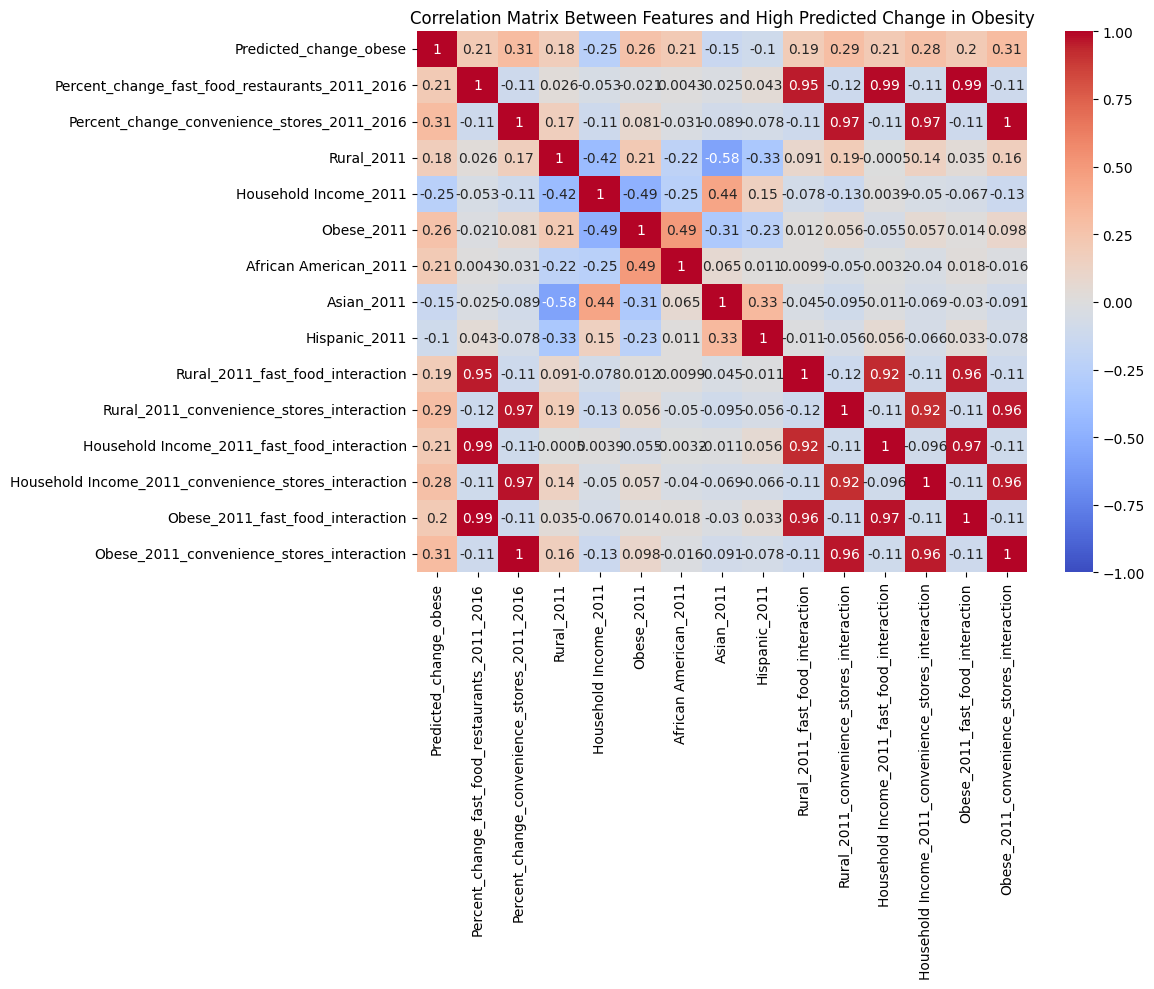

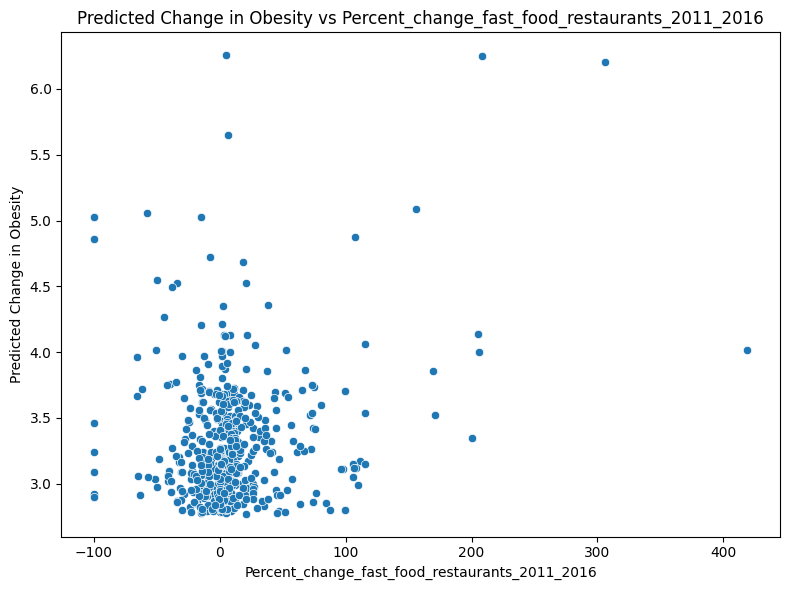

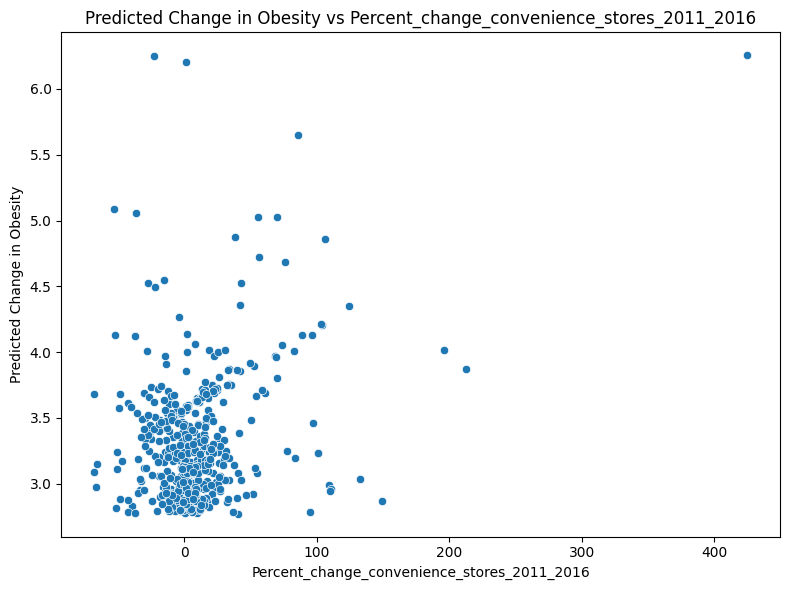

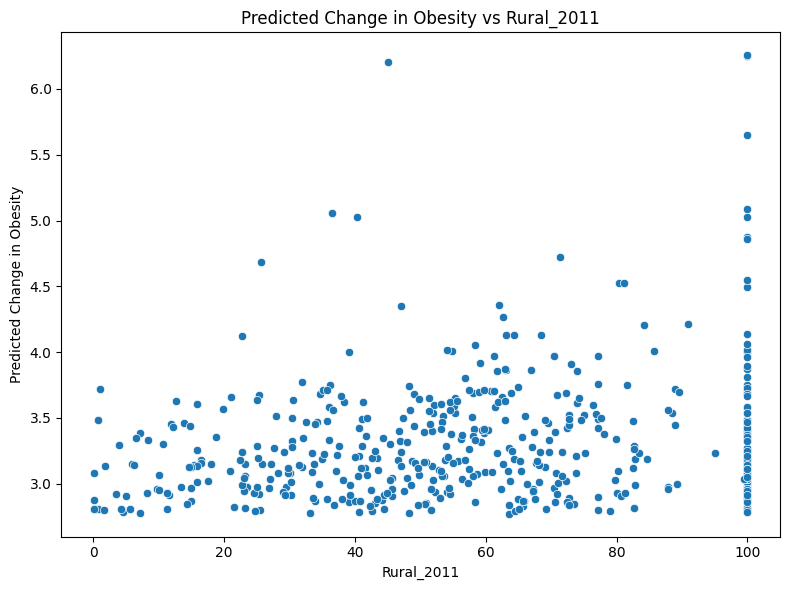

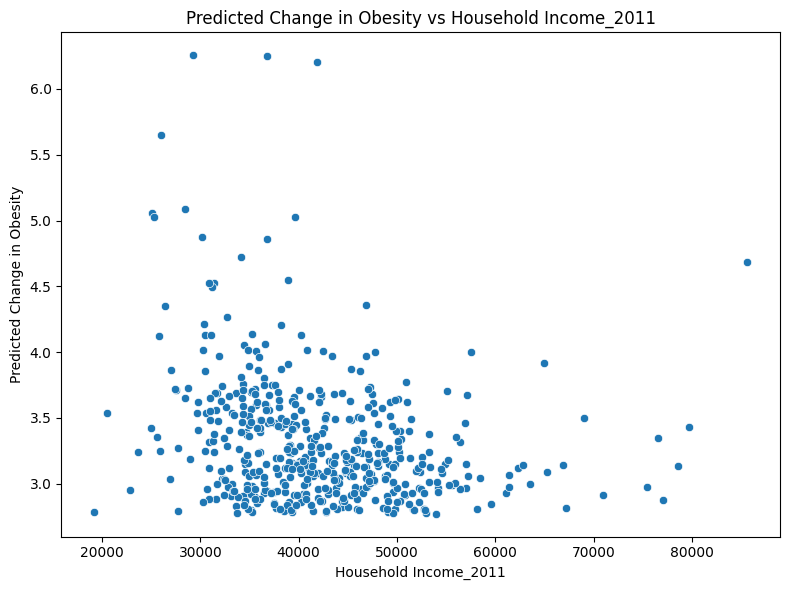

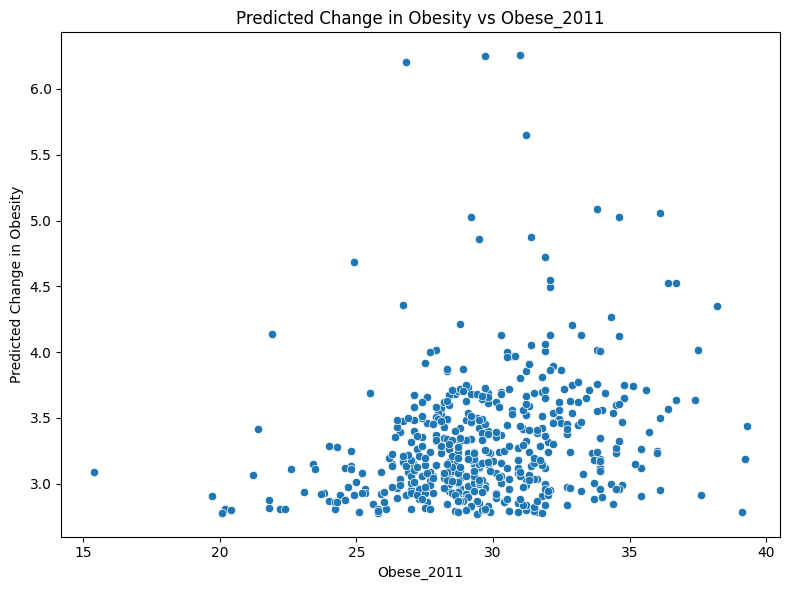

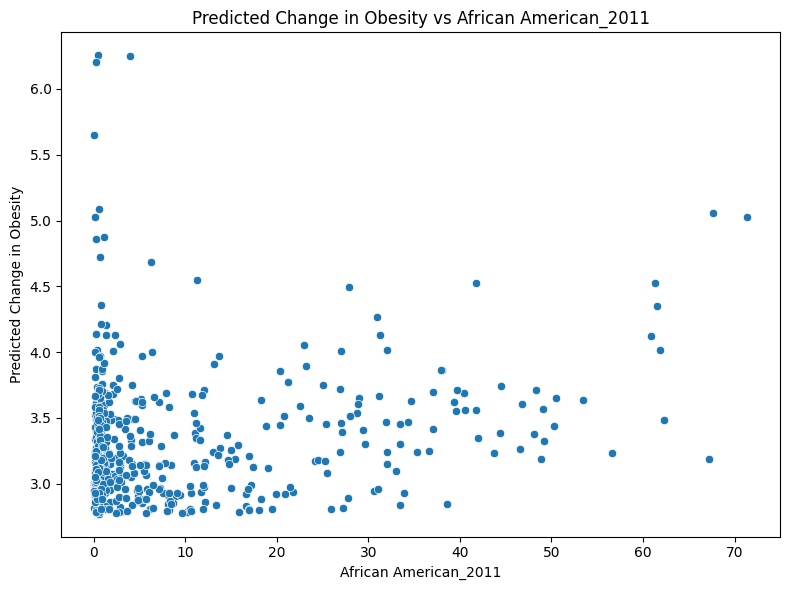

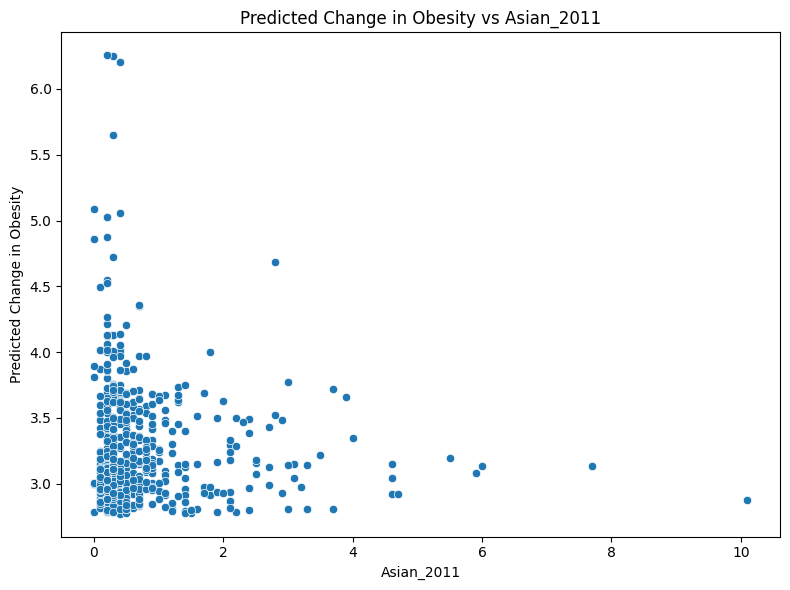

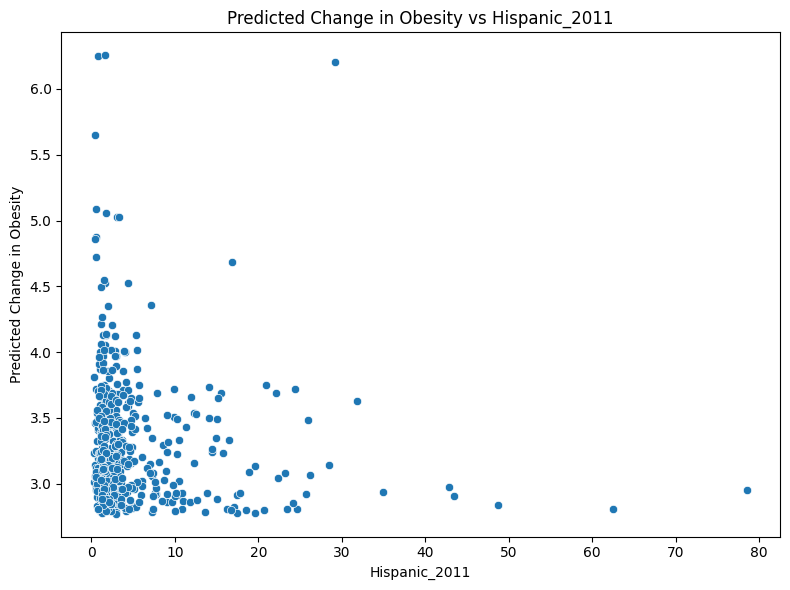

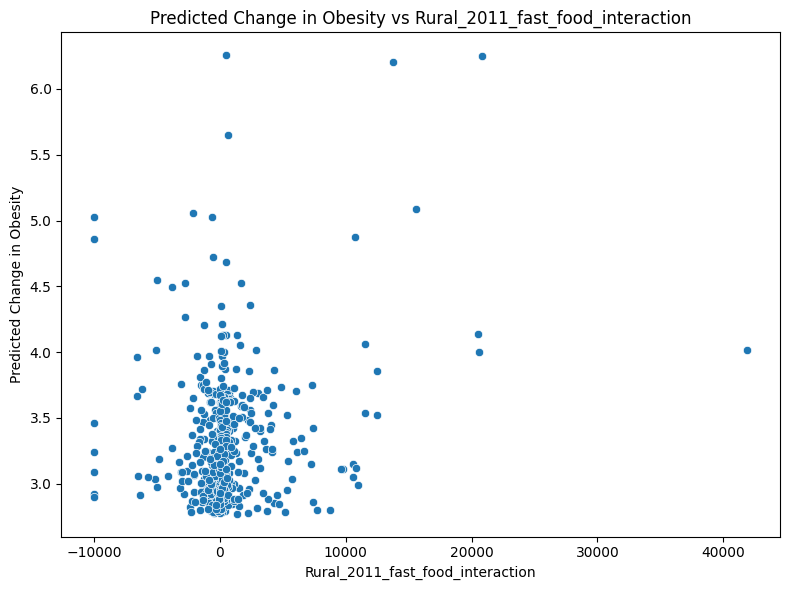

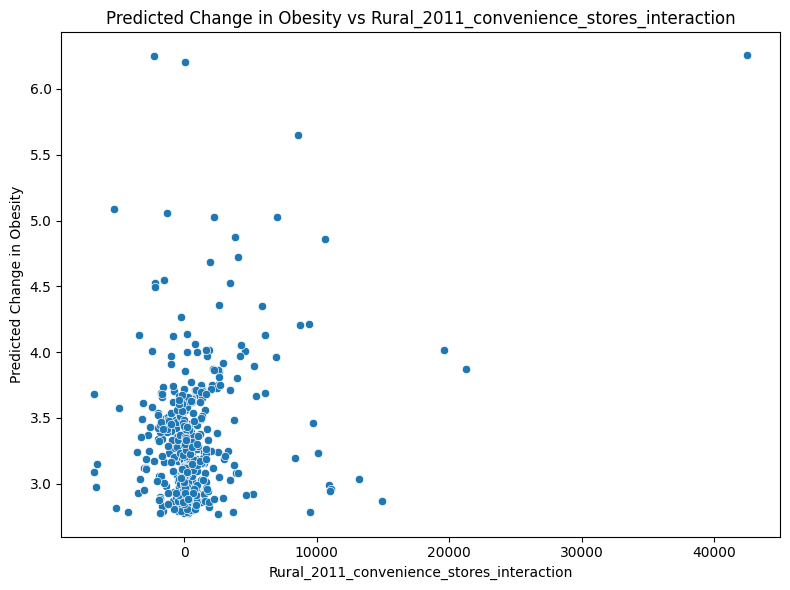

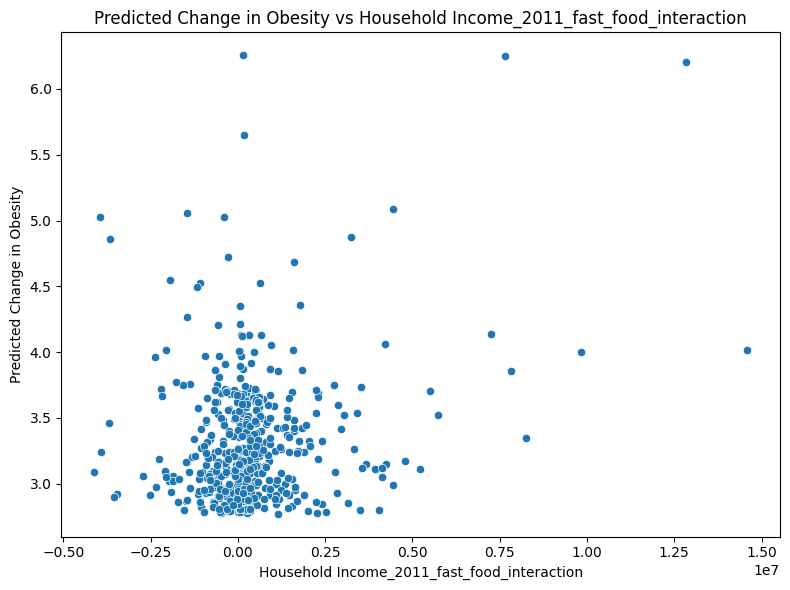

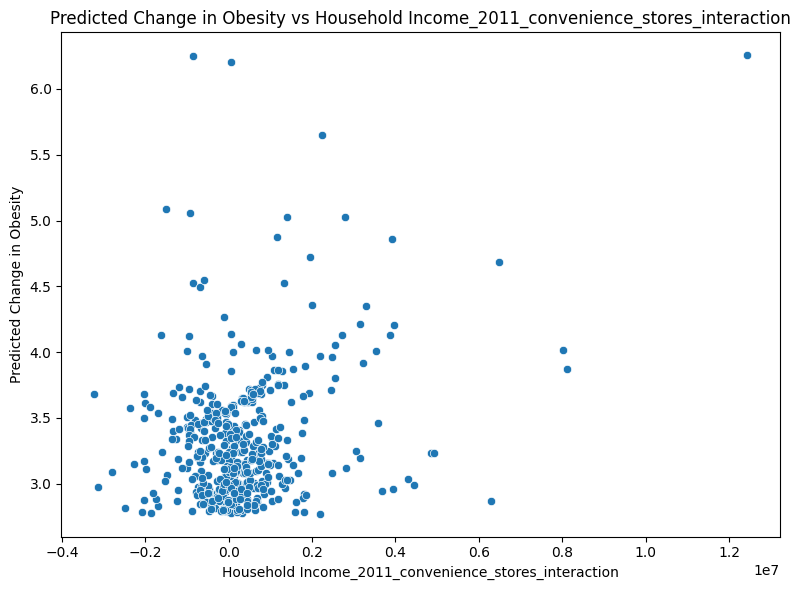

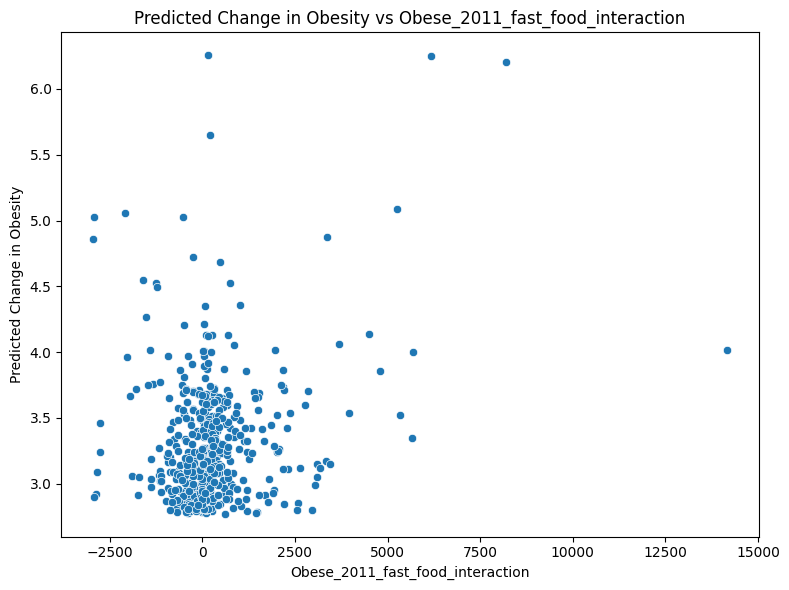

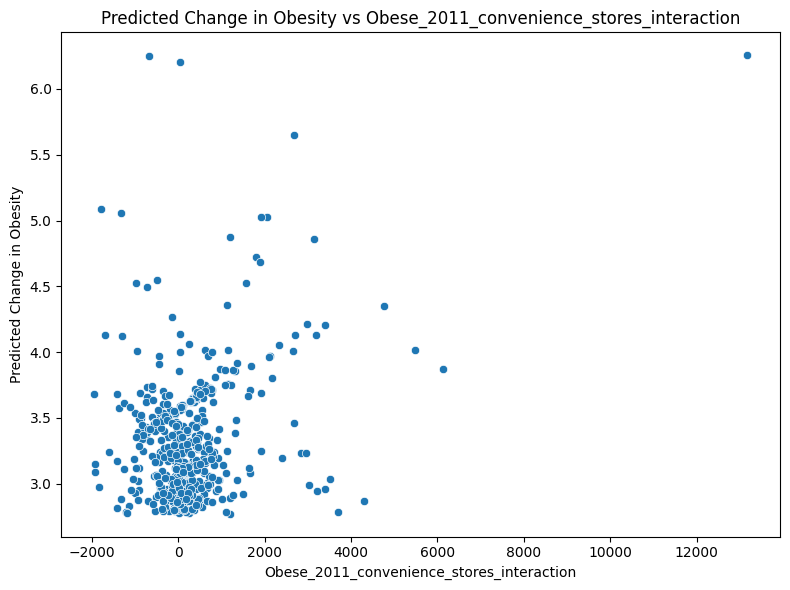

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the predictions
predictions = pd.read_csv('new_state_specific_predictions.csv')

# Merge predictions with the original cleaned data to get the features
merged_data_with_predictions = pd.merge(cleaned_data, predictions, on=['FIPS'])

# Define a threshold for "high" predicted obesity rate
# For example, let's consider the top 20% of predicted obesity rates as "high"
threshold = merged_data_with_predictions['Predicted_change_obese'].quantile(0.80)
high_obesity_data = merged_data_with_predictions[merged_data_with_predictions['Predicted_change_obese'] > threshold]

# Calculate correlations between high predicted obesity rates and features
features_to_correlate = [
    'Percent_change_fast_food_restaurants_2011_2016',
    'Percent_change_convenience_stores_2011_2016',
    'Rural_2011', 
    'Household Income_2011', 
    'Obese_2011', 
    'African American_2011', 
    'Asian_2011', 
    'Hispanic_2011'
]

# Add interaction terms if needed
interaction_terms = [
    'Rural_2011_fast_food_interaction',
    'Rural_2011_convenience_stores_interaction',
    'Household Income_2011_fast_food_interaction',
    'Household Income_2011_convenience_stores_interaction',
    'Obese_2011_fast_food_interaction',
    'Obese_2011_convenience_stores_interaction'
]

# Combine the features and interaction terms
all_features = features_to_correlate + interaction_terms

# Correlation matrix for high predicted obesity rates with features
correlation_matrix = high_obesity_data[['Predicted_change_obese'] + all_features].corr()

# Visualize the correlations using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Between Features and High Predicted Change in Obesity")
plt.tight_layout()
plt.show()

# Optional: Scatter plot for a detailed view of the most correlated features
for feature in all_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=high_obesity_data[feature], y=high_obesity_data['Predicted_change_obese'])
    plt.title(f"Predicted Change in Obesity vs {feature}")
    plt.xlabel(feature)
    plt.ylabel('Predicted Change in Obesity')
    plt.tight_layout()
    plt.show()


In [33]:
cleaned_data.columns

Index(['FIPS', 'State_2011', 'County_2011', 'Rural_2011',
       'Household Income_2011', 'African American_2011', 'Asian_2011',
       'Hispanic_2011', 'Obese_2011', 'PCP Ratio_2011', 'change_rural',
       'change_obese', 'change_binge_drinking', 'change_physical_inactivity',
       'change_mentally_unhealthy_days', 'change_fair_poor_health',
       'Percent_change_fast_food_restaurants_2011_2016',
       'Percent_change_convenience_stores_2011_2016',
       'Metro_nonmetro_counties_2010', 'Persistent_poverty_counties_2010',
       'Population_loss_counties_2010', 'Recreation_fitness_facilities_2011',
       'Grocery_stores_2011', 'Low_access_to_stores_2010',
       'SNAP_benefits_per_capita_2012', 'WIC_redemptions_per_capita_2011',
       'Rural_2011_fast_food_interaction',
       'Rural_2011_convenience_stores_interaction',
       'Household Income_2011_fast_food_interaction',
       'Household Income_2011_convenience_stores_interaction',
       'Obese_2011_fast_food_interaction',


Index(['FIPS', 'State', 'County', 'Predicted_change_obese',
       'Predicted_change_binge_drinking',
       'Predicted_change_physical_inactivity',
       'Predicted_change_mentally_unhealthy_days',
       'Predicted_change_fair_poor_health'],
      dtype='object')
Index(['FIPS', 'State_2011', 'County_2011', 'Rural_2011',
       'Household Income_2011', 'African American_2011', 'Asian_2011',
       'Hispanic_2011', 'Obese_2011', 'PCP Ratio_2011', 'change_rural',
       'change_obese', 'change_binge_drinking', 'change_physical_inactivity',
       'change_mentally_unhealthy_days', 'change_fair_poor_health',
       'Percent_change_fast_food_restaurants_2011_2016',
       'Percent_change_convenience_stores_2011_2016',
       'Metro_nonmetro_counties_2010', 'Persistent_poverty_counties_2010',
       'Population_loss_counties_2010', 'Recreation_fitness_facilities_2011',
       'Grocery_stores_2011', 'Low_access_to_stores_2010',
       'SNAP_benefits_per_capita_2012', 'WIC_redemptions_per_ca

/var/folders/cv/0rgfl8cs40g0lnwkzp8sskhh0000gn/T/ipykernel_59619/3592684384.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')


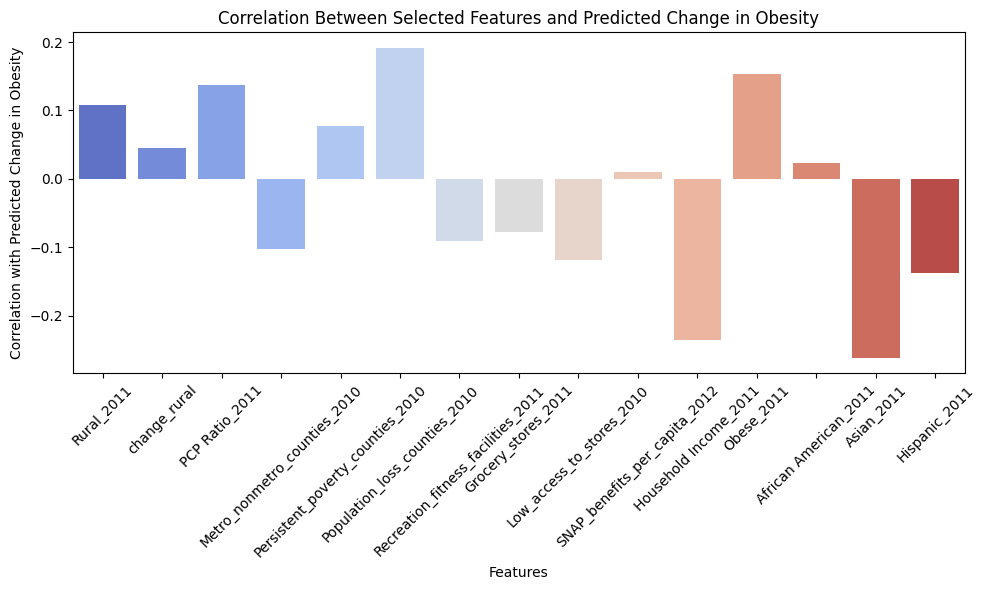

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the predictions
predictions = pd.read_csv('new_state_specific_predictions.csv')
print(predictions.columns)

# Merge predictions with the original cleaned data to get the features
merged_data_with_predictions = pd.merge(cleaned_data, predictions, on=['FIPS'])

merged_data_with_predictions['PCP Ratio_2011'] = merged_data_with_predictions['PCP Ratio_2011'].str.split(':').str[0].astype(int)


print(merged_data_with_predictions.columns)

# Define the features to correlate with the predicted change in obesity
features_to_correlate = [
    'Rural_2011', 
    'change_rural',
    'PCP Ratio_2011',
    'Metro_nonmetro_counties_2010', 'Persistent_poverty_counties_2010',
       'Population_loss_counties_2010', 'Recreation_fitness_facilities_2011',
    'Grocery_stores_2011', 'Low_access_to_stores_2010',
    'SNAP_benefits_per_capita_2012',
    'Household Income_2011', 
    'Obese_2011', 
    'African American_2011', 
    'Asian_2011', 
    'Hispanic_2011'
]

# Add the predicted change in obesity to the features list
features_with_predicted_obesity = features_to_correlate + ['Predicted_change_obese_x']

# Calculate the correlation matrix
correlation_matrix = merged_data_with_predictions[features_with_predicted_obesity].corr()

# Extract correlations of the selected features with predicted change in obesity
correlations = correlation_matrix['Predicted_change_obese_x'].drop('Predicted_change_obese_x')

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')
plt.title('Correlation Between Selected Features and Predicted Change in Obesity')
plt.xlabel('Features')
plt.ylabel('Correlation with Predicted Change in Obesity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


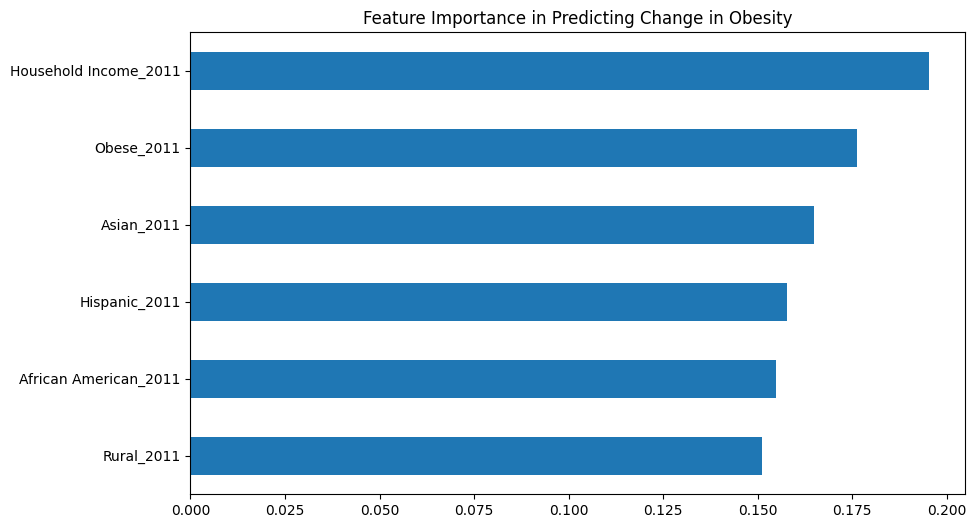

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare your data
X = merged_data_with_predictions[features_to_correlate]
y = merged_data_with_predictions['Predicted_change_obese']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=features_to_correlate)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6), title='Feature Importance in Predicting Change in Obesity')
plt.show()


In [31]:
cleaned_data = merged_data_with_predictions

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Define environmental features
environmental_features = [
    'Rural_2011', 
    'Household Income_2011', 
    'Obese_2011', 
    'African American_2011', 
    'Asian_2011', 
    'Hispanic_2011'
]

# Define key predictors (focus of the analysis)
key_predictors = [
    'Percent_change_fast_food_restaurants_2011_2016',
    'Percent_change_convenience_stores_2011_2016'
]

# Function to train and return feature importances
def train_and_get_importance(X, y, predictors):
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X[predictors], y)
    return pd.Series(rf_model.feature_importances_, index=predictors)

# Stratify data by each environmental feature
for feature in environmental_features:
    # Create bins based on quantiles for stratification
    bins = pd.qcut(cleaned_data[feature], q=3, labels=False)
    cleaned_data[f'{feature}_bin'] = bins
    
    # Collect feature importances for each bin
    importances = []
    for bin_value in cleaned_data[f'{feature}_bin'].unique():
        # Filter data for the current bin
        bin_data = cleaned_data[cleaned_data[f'{feature}_bin'] == bin_value]
        
        # Define predictors and target
        X = bin_data[key_predictors]
        y = bin_data['Predicted_change_obese']
        
        # Calculate feature importances
        importance = train_and_get_importance(X, y, key_predictors)
        importances.append(importance)
    
    # Visualize the importance differences for the feature
    importance_df = pd.DataFrame(importances, index=[f'Low {feature}', f'High {feature}'])
    importance_df.plot(kind='barh', title=f'Feature Importance Stratified by {feature}', figsize=(10, 6))
    plt.xlabel('Importance Score')
    plt.show()


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by RandomForestRegressor.